In [103]:
import os
import sys
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression 
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle


In [47]:
fname = 'data_bio482.pkl'
data_df = pd.read_pickle(fname)

In [72]:
#df = data_df
display(data_df)

,Cell_APThreshold_Slope,Cell_Anatomy,Cell_Counter,Cell_Depth,Cell_ID,Cell_Layer,Cell_TargetedBrainArea,Cell_Type,Cell_tdTomatoExpressing,Mouse_DateOfBirth,...,Sweep_Counter,Sweep_MembranePotential,Sweep_MembranePotential_SamplingRate,Sweep_PassiveContactTimes,Sweep_QuietTimes,Sweep_StartTime,Sweep_Type,Sweep_WhiskerAngle,Sweep_WhiskerAngle_SamplingRate,Sweep_WhiskingTimes
0,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,1.0,"[-0.044009375, -0.044028125, -0.0439875, -0.04...",20000.0,"[[4.567, 4.713], [7.327, 7.519], [14.481, 14.6...","[[0.002, 4.564], [4.606, 6.09], [14.634, 15.52...",2005.0,active touch,"[2.740000000000009, 2.740000000000009, 2.74000...",100.0,"[[6.118, 6.326], [7.942, 13.856]]"
1,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,2.0,"[-0.046275, -0.04629375, -0.046259375, -0.0462...",20000.0,"[[15.274999999999999, 15.375], [16.247, 16.643...","[[0.002, 4.496], [5.558, 6.626], [13.406, 15.2...",2005.0,active touch,"[2.680000000000007, 2.680000000000007, 2.68000...",100.0,"[[4.7, 5.196], [6.696, 11.15], [12.032, 13.006..."
2,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,3.0,"[-0.041896875, -0.0419125, -0.041909375, -0.04...",20000.0,"[[4.347000000000001, 7.0390000000000015], [8.2...","[[0.002, 2.128], [6.252, 7.01], [7.15, 20.0]]",2005.0,passive contact,"[1.4958937492820894, 1.5019819900587095, 1.509...",100.0,"[[2.15, 3.652], [4.362, 5.848]]"
3,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,4.0,"[-0.04655625, -0.0465875, -0.046575, -0.046596...",20000.0,nan,"[[0.002, 2.764], [12.03, 14.464], [14.814, 15....",2005.0,active touch,"[2.467493802679826, 2.459711310964792, 2.46562...",100.0,"[[2.766, 12.026], [15.626, 18.406], [18.814, 1..."
4,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,5.0,"[-0.047296875, -0.047284375, -0.047265625, -0....",20000.0,"[[4.411000000000001, 4.4809999999999945], [5.2...","[[0.002, 3.36], [3.57, 4.424], [4.48, 5.224], ...",2005.0,active touch,"[2.4399999999999977, 2.4399999999999977, 2.440...",100.0,"[[5.228, 5.624], [7.462, 8.022], [11.002, 15.2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,20.0,nan,1.0,196.0,AP068_1,L2/3,C2,SST,True,2015.0,...,23.0,"[-0.059725001, -0.0597375, -0.059731249, -0.05...",20000.0,nan,"[[0.002, 10.728], [17.854, 20.0]]",2015.0,free whisking,"[-139.2381, -139.2381, -139.2381, -139.2381, -...",100.0,"[11.022, 16.274]"
827,20.0,nan,1.0,196.0,AP068_1,L2/3,C2,SST,True,2015.0,...,24.0,"[-0.058984376, -0.058984376, -0.058990624, -0....",20000.0,nan,"[[0.002, 0.238], [1.162, 3.608], [4.906, 6.216...",2015.0,free whisking,"[-144.9738, -144.9738, -144.9738, -145.6111, -...",100.0,"[[0.264, 1.158], [3.694, 4.776], [8.728, 9.896..."
828,20.0,nan,1.0,196.0,AP068_1,L2/3,C2,SST,True,2015.0,...,25.0,"[-0.053018749, -0.05298125, -0.05300625, -0.05...",20000.0,nan,"[[0.002, 1.74], [1.844, 6.52], [6.532, 9.15], ...",2015.0,free whisking,"[-150.0723, -150.0723, -150.0723, -150.0723, -...",100.0,"[[9.166, 9.878], [10.358, 12.526], [12.958, 13..."
829,20.0,nan,1.0,196.0,AP068_1,L2/3,C2,SST,True,2015.0,...,26.0,"[-0.049796876, -0.049843751, -0.049878124, -0....",20000.0,nan,"[[0.002, 0.146], [0.53, 1.858], [2.408, 3.664]...",2015.0,free whisking,"[-144.9738, -144.9738, -144.9738, -145.6111, -...",100.0,"[[0.222, 0.526], [1.892, 2.404], [3.692, 3.818..."


In [73]:
print(data_df.columns)
table = data_df.values
active_touch_df = data_df[data_df['Sweep_Type']=='active touch'] 
df = active_touch_df

Index(['Cell_APThreshold_Slope', 'Cell_Anatomy', 'Cell_Counter', 'Cell_Depth',
       'Cell_ID', 'Cell_Layer', 'Cell_TargetedBrainArea', 'Cell_Type',
       'Cell_tdTomatoExpressing', 'Mouse_DateOfBirth', 'Mouse_Genotype',
       'Mouse_Name', 'Mouse_Sex', 'Sweep_ActiveContactTimes', 'Sweep_Counter',
       'Sweep_MembranePotential', 'Sweep_MembranePotential_SamplingRate',
       'Sweep_PassiveContactTimes', 'Sweep_QuietTimes', 'Sweep_StartTime',
       'Sweep_Type', 'Sweep_WhiskerAngle', 'Sweep_WhiskerAngle_SamplingRate',
       'Sweep_WhiskingTimes'],
      dtype='object')


In [87]:
display(df)

,Cell_APThreshold_Slope,Cell_Anatomy,Cell_Counter,Cell_Depth,Cell_ID,Cell_Layer,Cell_TargetedBrainArea,Cell_Type,Cell_tdTomatoExpressing,Mouse_DateOfBirth,...,Sweep_Counter,Sweep_MembranePotential,Sweep_MembranePotential_SamplingRate,Sweep_PassiveContactTimes,Sweep_QuietTimes,Sweep_StartTime,Sweep_Type,Sweep_WhiskerAngle,Sweep_WhiskerAngle_SamplingRate,Sweep_WhiskingTimes
0,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,1.0,"[-0.044009375, -0.044028125, -0.0439875, -0.04...",20000.0,"[[4.567, 4.713], [7.327, 7.519], [14.481, 14.6...","[[0.002, 4.564], [4.606, 6.09], [14.634, 15.52...",2005.0,active touch,"[2.740000000000009, 2.740000000000009, 2.74000...",100.0,"[[6.118, 6.326], [7.942, 13.856]]"
1,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,2.0,"[-0.046275, -0.04629375, -0.046259375, -0.0462...",20000.0,"[[15.274999999999999, 15.375], [16.247, 16.643...","[[0.002, 4.496], [5.558, 6.626], [13.406, 15.2...",2005.0,active touch,"[2.680000000000007, 2.680000000000007, 2.68000...",100.0,"[[4.7, 5.196], [6.696, 11.15], [12.032, 13.006..."
3,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,4.0,"[-0.04655625, -0.0465875, -0.046575, -0.046596...",20000.0,nan,"[[0.002, 2.764], [12.03, 14.464], [14.814, 15....",2005.0,active touch,"[2.467493802679826, 2.459711310964792, 2.46562...",100.0,"[[2.766, 12.026], [15.626, 18.406], [18.814, 1..."
4,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,5.0,"[-0.047296875, -0.047284375, -0.047265625, -0....",20000.0,"[[4.411000000000001, 4.4809999999999945], [5.2...","[[0.002, 3.36], [3.57, 4.424], [4.48, 5.224], ...",2005.0,active touch,"[2.4399999999999977, 2.4399999999999977, 2.440...",100.0,"[[5.228, 5.624], [7.462, 8.022], [11.002, 15.2..."
5,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,6.0,"[-0.040259375, -0.040284375, -0.040284375, -0....",20000.0,"[[1.992999999999995, 2.272999999999996], [9.82...","[[0.002, 1.99], [2.274, 3.632], [3.796, 4.904]...",2005.0,active touch,"[1.789999999999992, 1.789999999999992, 1.78999...",100.0,"[[4.954, 5.07], [6.216, 9.328], [9.832, 10.07]..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,15.0,L4,2.0,460.0,TK539_2,L4,C2,EXC,True,2017.0,...,1.0,"[-0.06493165939018428, -0.06495139106057463, -...",20000.0,nan,"[[0.002, 6.85], [7.686, 9.5], [13.596, 19.598]...",2017.0,active touch,"[194.3828, 194.3828, 194.0966, 193.8104, 193.8...",100.0,"[[6.852, 7.618], [9.502, 13.594], [19.614, 19...."
621,15.0,L4,2.0,460.0,TK539_2,L4,C2,EXC,True,2017.0,...,2.0,"[-0.059617267734583854, -0.05954162980331142, ...",20000.0,nan,"[[0.002, 2.168], [2.276, 10.734], [11.176, 43....",2017.0,active touch,"[191.8068, 191.8068, 191.8068, 191.8068, 191.8...",100.0,"[[10.75, 11.144], [43.158, 43.446], [53.204, 5..."
623,10.0,L4,1.0,432.0,TK545_1,L4,C2,EXC,True,2016.0,...,1.0,"[-0.05053415164553155, -0.05047824550450753, -...",20000.0,nan,"[[0.002, 0.188], [1.938, 7.156], [15.986, 16.0]]",2017.0,active touch,"[178.9267, 177.2093, 176.6369, 177.4955, 177.4...",100.0,"[[0.878, 1.696], [7.158, 15.982]]"
625,25.0,L4,2.0,390.0,TK545_2,L4,C2,EXC,True,2016.0,...,1.0,"[-0.07429106450681139, -0.07431737349338013, -...",20000.0,nan,"[[0.002, 3.026], [3.966, 5.5], [5.528, 6.81], ...",2017.0,active touch,"[181.2165, 181.2165, 180.9302, 180.9302, 180.9...",100.0,"[[3.066, 3.726], [16.632, 17.39], [18.592, 18...."


In [75]:
table.shape
# temps longueur du vecteur/ sampling rate

(831, 24)

In [76]:
## interspike interval (average them) with the magnetude 
# Cell_Type, Sweep_WhiskerAngle, Sweep_WhiskerAngle_SamplingRate, Sweep_WhiskingTimes :

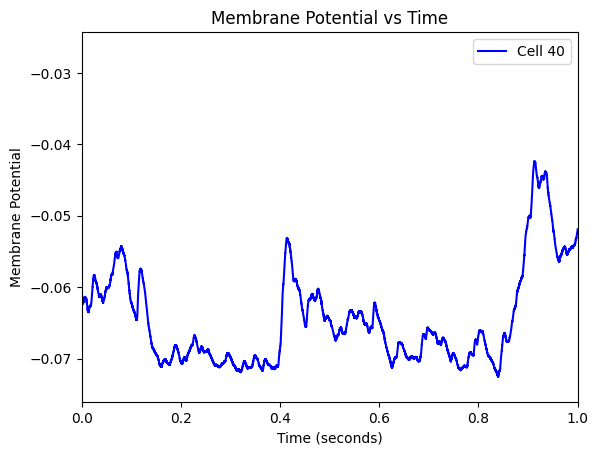

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

cell_nb = 40


# Assuming your DataFrame has the columns 'Sweep_MembranePotential' and 'Sweep_MembranePotential_SamplingRate'
# Replace these column names with the actual column names in your DataFrame
membrane_potential_column = 'Sweep_MembranePotential'
sampling_rate_column = 'Sweep_MembranePotential_SamplingRate'

# Choose the row you want to plot (e.g., first row with index 0)
selected_row = df.iloc[cell_nb]

# Extract membrane potential array and sampling rate for the selected row
membrane_potential = selected_row[membrane_potential_column]
sampling_rate = selected_row[sampling_rate_column]

# Calculate the time points for the x-axis
time_points = [i / sampling_rate for i in range(len(membrane_potential))]

# Plot the membrane potential
plt.plot(time_points, membrane_potential, label=f'Cell {cell_nb}', color = 'blue')

plt.xlim(0, 1)


# Customize your plot as needed (labels, title, legend, etc.)
plt.xlabel('Time (seconds)')
plt.ylabel('Membrane Potential')
plt.title('Membrane Potential vs Time')
plt.legend()
plt.show()


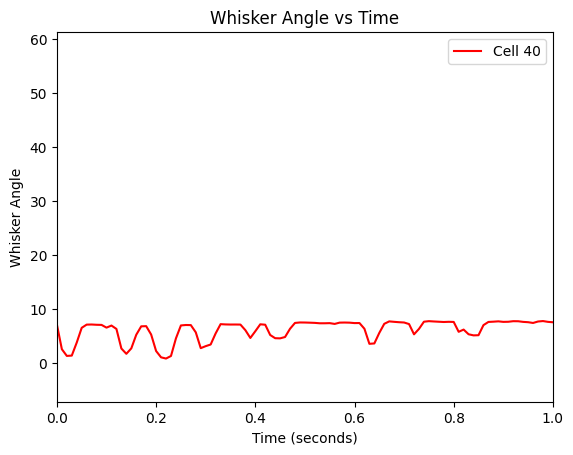

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your table is stored in a DataFrame named df
# Replace 'YourDataFrame.csv' with the actual file path or DataFrame variable
# df = pd.read_csv('YourDataFrame.csv')

# Assuming your DataFrame has the columns 'Sweep_WhiskerAngle', 'Sweep_WhiskerAngle_SamplingRate', and 'Sweep_ActiveContactTimes'
# Replace these column names with the actual column names in your DataFrame
whisker_angle_column = 'Sweep_WhiskerAngle'
whisker_sampling_rate_column = 'Sweep_WhiskerAngle_SamplingRate'
active_contact_times_column = 'Sweep_ActiveContactTimes'

# Choose the row you want to plot (e.g., cell number 20)
selected_row = df.iloc[cell_nb]

# Extract whisker angle array, sampling rate, and active contact times
whisker_angle = selected_row[whisker_angle_column]
whisker_sampling_rate = selected_row[whisker_sampling_rate_column]
active_contact_times = selected_row[active_contact_times_column]

# Calculate the time points for the x-axis
time_points_w = [i / whisker_sampling_rate for i in range(len(whisker_angle))]

# Plot the whisker angle
plt.plot(time_points_w, whisker_angle, label=f'Cell {cell_nb}', color='red')

# Set x-axis limits between 0 and 1 seconds
plt.xlim(0, 1)
#plt.ylim(0, 5)


# Draw vertical lines at active contact times
#for time_point in active_contact_times:
#    plt.axvline(x=time_point, color='green', linestyle='--', label='Active Contact Time')

# Customize your plot as needed (labels, title, legend, etc.)
plt.xlabel('Time (seconds)')
plt.ylabel('Whisker Angle')
plt.title('Whisker Angle vs Time')
plt.legend()
plt.show()


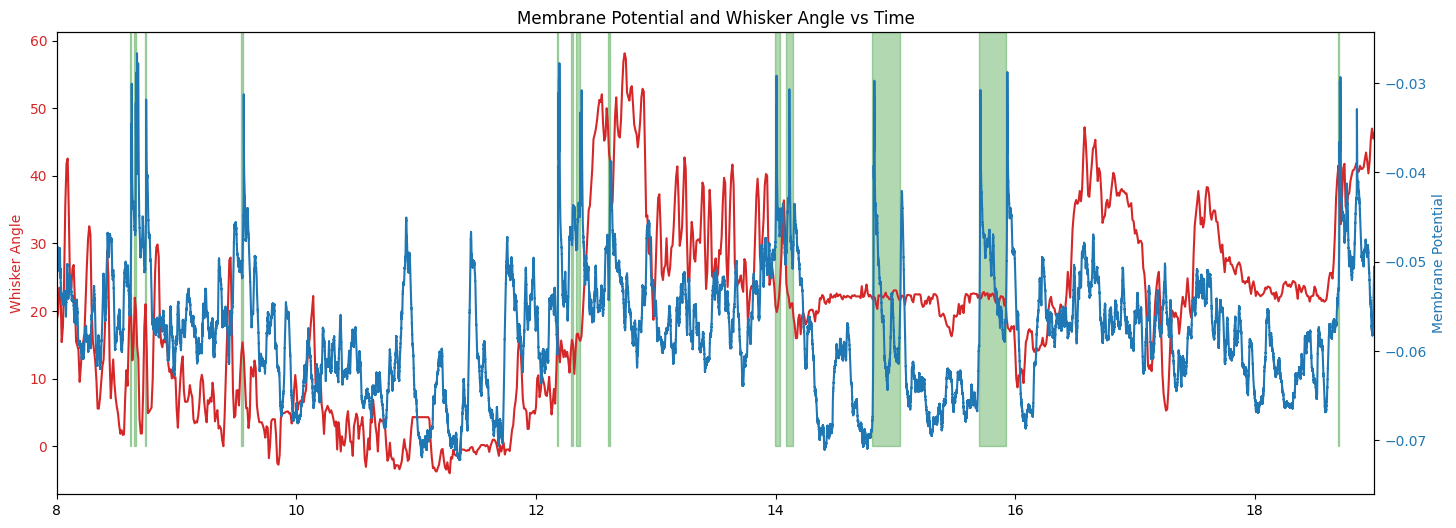

In [109]:
## Plot them both in same plot :

# Plot the membrane potential on the primary y-axis
fig, ax1 = plt.subplots(figsize=(17, 6))


color = 'tab:red'
ax1.set_ylabel('Whisker Angle', color=color)
ax1.plot(time_points_w, whisker_angle, label='Whisker Angle', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel('Membrane Potential', color=color)
ax2.plot(time_points, membrane_potential, label='Membrane Potential', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Draw longer boxes representing active contact time intervals
for interval in active_contact_times:
    start_time, end_time = interval
    height = ax1.get_ylim()[1]  # Height is dynamically calculated based on y-axis limit
    rect = Rectangle((start_time, 0), end_time - start_time, height, linewidth=1, edgecolor='green', facecolor='green', alpha=0.3)
    ax1.add_patch(rect)



# Customize your plot as needed (title, legends, etc.)
plt.title('Membrane Potential and Whisker Angle vs Time')

#plt.xlim(0, 1)
plt.xlim(8, 19)


# Show the plot
plt.show()

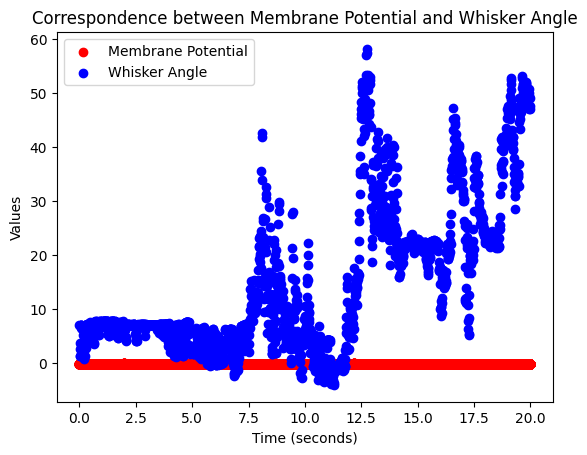

In [97]:
# Create a scatter plot
plt.scatter(time_points, membrane_potential, label='Membrane Potential', color='red')
plt.scatter(time_points_w, whisker_angle, label='Whisker Angle', color='blue')

# Customize your plot as needed (labels, title, legends, etc.)
plt.xlabel('Time (seconds)')
plt.ylabel('Values')
plt.title('Correspondence between Membrane Potential and Whisker Angle')
plt.legend()
plt.show()

In [98]:
Active_contact_sweep_column = 'Sweep_ActiveContactTimes'

# Choose the row you want to plot (e.g., cell number 20)
selected_row = df.iloc[cell_nb]

active_contact_times = selected_row[Active_contact_sweep_column]



In [99]:
print(active_contact_times)

[[ 8.609  8.619]
 [ 8.647  8.659]
 [ 8.733  8.743]
 [ 9.541  9.553]
 [12.173 12.185]
 [12.293 12.307]
 [12.333 12.365]
 [12.603 12.621]
 [13.993 14.037]
 [14.087 14.145]
 [14.807 15.035]
 [15.695 15.927]
 [18.695 18.703]]


### Consider the windows for the Membrane potential and the Whisker touch

Post : -0.1

Pre : 0.0

In [ ]:
# Get sweeps/trials recorded for that cell, that we are going to iterate over
trial_list = cell_df.Sweep_Counter.values
trial=trial_list[0]
# Get current trial data
cell_trial_df = cell_df[cell_df.Sweep_Counter==trial]

# Get the sampling rate and membrane potential (and derivative) from that sweep
        
sr_vm = cell_trial_df['Sweep_MembranePotential_SamplingRate'].values[0] #[0] to get the content of the array
membrane_potential = cell_trial_df['Sweep_MembranePotential'].values[0]
ap_vm_deriv_thresh = cell_trial_df['Cell_APThreshold_Slope'].values[0]
        
# Get and update recording duration for that cell by adding trial duration
trial_rec_duration = len(membrane_potential)/sr_vm
#tot_rec_duration += trial_rec_duration
        
# Detection of action potentials for that trial, and update total number of APs for that cell
#ap_params = None
ap_params = Function_Detect_APs(membrane_potential, sr_vm, ap_vm_deriv_thresh) 
#tot_number_ap += ap_params.shape[0]
          
# Check if this trial contains any AP...
ap_duration = []

if (ap_params.any()):
    ap_thresh_times = ap_params[:,0]
    ap_thresh_vm = ap_params[:,1]
    ap_peak_times = ap_params[:,2]
    ap_peak_vm = ap_params[:,3]
    ap_duration = ap_params[:,5] #check for no-APs (cells with no spikes in ALL trials:EXC5,16 FR=0, AP_dur=np.nan)

    #... if so, cut-out individual APs to keep subthreshold Vm only
    vm_sub = Function_CutAPs(membrane_potential, sr_vm, ap_peak_times, ap_thresh_times)
            
     # Else if no AP, subthreshold Vm is just Vm
else:
            
         vm_sub = membrane_potential.copy()
            
# Optional plotting: show AP and AP peak times

time=[];
for i in range(0, len(membrane_potential)):
    time.append(i/sr_vm)

ap_peak_index=np.round(ap_peak_times * sr_vm)
ap_thresh_index=np.round(ap_thresh_times * sr_vm)